***1. Write a program that splits the original sample into a training set and a test set ( training set, validation set, test set) with train_test_split method od Skikit Learn library.***

In [16]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [17]:
df = pd.read_exel('C:\\Users\\trann\\OneDrive\
\Dokumente\\1ThuyDung_HDA\\ML\\Algerian_forest_fires_dataset_UPDATE.csv')
df.head(20)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Class
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [18]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [19]:
# make sure there are no string values
c = []
for i in df.Class:
    if 'not' in i :
        c.append(0)
    else:
        c.append(1)
df['fire'] = c
data=df.drop(columns=['day', 'month', 'year', 'Class'], axis =1)
data


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,fire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0
120,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0


In [20]:
# choosing target value
y = data.FWI.values

#choosing X
X = data.drop(columns = ['FWI']).values

In [21]:
#split df into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

***2. Train the linear regression model for the training sample***

In [22]:
#create Linear regression
regr = LinearRegression()

#train the model using the train set
regr.fit(X_train, y_train)

#Make predictions using the testing set
y_pred = regr.predict(X_test)

***3. Check the accuracy of the model from the test set***

In [23]:
from sklearn.metrics import accuracy_score
print('Linear Regression accuracy : {:.2f}%'.format(100*regr.score(X_train, y_train)))

data

Linear Regression accuracy : 99.34%


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,fire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0
120,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0


***4.Buil a model using polynomial function. Build plots with the dependence of the accuracy on the degree of polynomial function.***

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.9s remaining:   16.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.9s finished


best value of C for degree 1 is 0.040852858039285615 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished


best value of C for degree 2 is 0.010233402121916417 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


best value of C for degree 3 is 0.01 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.7s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s finished


best value of C for degree 4 is 0.15573447729261344 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.6s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s finished


best value of C for degree 5 is 0.01 
accuaracy =  [0.9583333333333334, 0.9749999999999999, 0.9249999999999998, 0.9083333333333334, 0.9083333333333334]


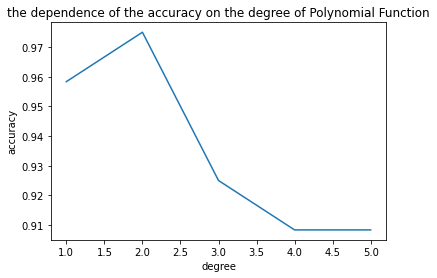

In [24]:
from numpy import mean, std
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#choosing fire as target value
y = data['fire']
#choosing X
X = data.drop(columns = ['fire'])


accuracy = []
degrees = [1,2,3, 4, 5]
C = 1



for i in range(len(degrees)):
    poly = PolynomialFeatures(degree = degrees[i], include_bias = False)
    
    #avoid overfitting
    # Regularization parameter tuning
    X_poly = poly.fit_transform(X) # only to find the best regularization 
    skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=17)
    C_values = np.logspace(-2,3,500)
    logit_searcher = LogisticRegressionCV(Cs = C_values, cv = skf,
                                     verbose  = 1, n_jobs = -1)
    logit_searcher.fit(X_poly,y)
    C = logit_searcher.C_
    print('best value of C for degree {} is {} '.format(degrees[i],C[0]))
    
    model = LogisticRegression(penalty='l2',C=C[0], random_state=17)
    pipeline = Pipeline([
                            ('Polynomial Features',poly),
                            ('LogisticRegression', model)
                        ]     
                       )
    pipeline.fit(X,y)
    
    #evaluate
    score = cross_val_score(
        pipeline, X, y, scoring='accuracy', cv=10
    )
    accuracy.append(mean(score))
print('accuaracy = ',accuracy)
plt.plot(degrees, accuracy)
plt.title('the dependence of the accuracy on the degree of Polynomial Function')
plt.xlabel('degree')
plt.ylabel('accuracy')

plt.show()


***5. Build a model using regularization.On the basis of experiments, select parameters for regularization. Build plots with the dependence of the error on the regularization coefficient.***

In [46]:
# Regularization (Ridge and Lasso) is to avoid overfitting
%matplotlib inline
from matplotlib import pyplot as plt
from cycler import cycler
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error


In [47]:
n_alphas = 200
alphas = np.linspace(0.0001,1, n_alphas)
model=Lasso()

In [48]:
# detemine the best value of alpha
lasso_cv = LassoCV(alphas=alphas,
                  cv = 3, random_state=17)
lasso_cv.fit(X,y)
lasso_cv.coef_

array([-1.74821598e-02,  1.13672898e-02, -1.50613075e-02,  1.03877050e-02,
        1.45454602e-02, -1.16836668e-03,  3.13132700e-05,  1.18891467e-01,
       -0.00000000e+00,  0.00000000e+00])

In [49]:
best_a = lasso_cv.alpha_
print("the selected alpha is ", best_a)

the selected alpha is  0.02522311557788945


In [50]:
abs_errors=[]
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X,y)
    error = cross_val_score(lasso, X, y, scoring = "neg_mean_squared_error", cv = 3 )
    abs_errors.append(abs(mean(error)))
abs_errors[:5]

[0.07848947352745644,
 0.07230272914057342,
 0.06953300830403357,
 0.06868788995273638,
 0.06811042475158502]

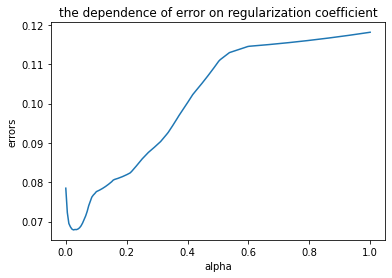

In [51]:
plt.plot(alphas,abs_errors)
plt.xlabel("alpha")
plt.ylabel("errors")
plt.title("the dependence of error on regularization coefficient")
plt.show()